In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('mex_clean.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85
...,...,...,...,...,...,...,...,...,...,...,...,...
12689,12690,México DF Radio Taxi,2016-10-27 09:10:05,2016-10-27 10:14:10,-99.180762,19.369210,-99.180013,19.370270,N,3846,8261,427
12690,12691,México DF Taxi de Sitio,2016-10-27 10:53:15,2016-10-27 11:01:53,-99.059582,19.307219,-99.065798,19.306472,N,518,2498,115
12691,12692,México DF Taxi Libre,2016-10-27 11:19:44,2016-10-27 11:38:35,-99.170637,19.283637,-99.178194,19.280982,N,1131,6051,228
12692,12693,México DF Taxi de Sitio,2016-10-28 06:49:41,2016-10-28 06:51:25,-99.194384,19.396768,-99.194622,19.396717,N,104,49,96


In [ ]:
df.shape

(12694, 12)

In [ ]:
df.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,1.269400e+04,12694.000000,1.269400e+04
mean,6347.500000,-99.136155,19.385067,-99.133728,19.386764,2.298377e+04,6666.431700,1.161270e+06
std,3664.586493,0.430001,0.129518,0.429582,0.131199,2.293364e+05,11386.891512,5.799612e+07
min,1.000000,-108.985069,18.829117,-108.987429,18.829103,2.000000e+00,21.000000,0.000000e+00
25%,3174.250000,-99.195615,19.325832,-99.192102,19.325325,4.840000e+02,1775.000000,8.900000e+01
50%,6347.500000,-99.164436,19.371382,-99.160705,19.374913,1.033500e+03,3948.000000,2.340000e+02
75%,9520.750000,-99.107092,19.432106,-99.107355,19.434360,2.368750e+03,8265.000000,5.910000e+02
max,12694.000000,-86.871347,25.752964,-86.871002,25.781058,1.657095e+07,802537.000000,4.429346e+09


In [ ]:
df.dtypes

id                      int64
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dist_meters             int64
wait_sec                int64
dtype: object

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85


In [ ]:
app_df = df[['pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
app_df.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353
1,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538
2,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530
3,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256
4,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754


In [ ]:
app_df

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353
1,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538
2,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530
3,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256
4,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754
...,...,...,...,...,...,...
12689,2016-10-27 09:10:05,2016-10-27 10:14:10,-99.180762,19.369210,-99.180013,19.370270
12690,2016-10-27 10:53:15,2016-10-27 11:01:53,-99.059582,19.307219,-99.065798,19.306472
12691,2016-10-27 11:19:44,2016-10-27 11:38:35,-99.170637,19.283637,-99.178194,19.280982
12692,2016-10-28 06:49:41,2016-10-28 06:51:25,-99.194384,19.396768,-99.194622,19.396717


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
shape_df = gpd.read_file('/content/gis/gis_osm_transport_free_1.shp')

In [ ]:
#Pickup Coordinates
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(app_df['pickup_longitude'], app_df['pickup_latitude'])]
geo_df = gpd.GeoDataFrame(app_df, crs=loc_crs, geometry=loc_geom)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


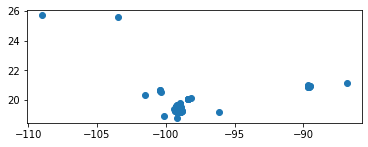

In [ ]:
geo_df.plot()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


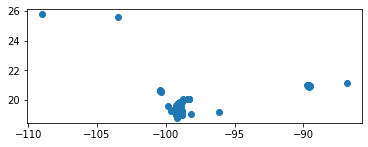

In [ ]:
#Dropoff Coordinates
loc_crs1 = {'init': 'epsg:4326'}
loc_geom1 = [Point(xy) for xy in zip(app_df['dropoff_longitude'], app_df['dropoff_latitude'])]
geo_df1 = gpd.GeoDataFrame(app_df, crs=loc_crs1, geometry=loc_geom1)
geo_df1.plot()

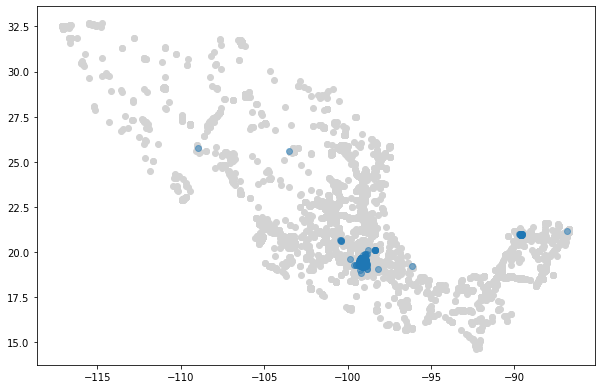

In [ ]:
#Pickup Layoff Transport

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

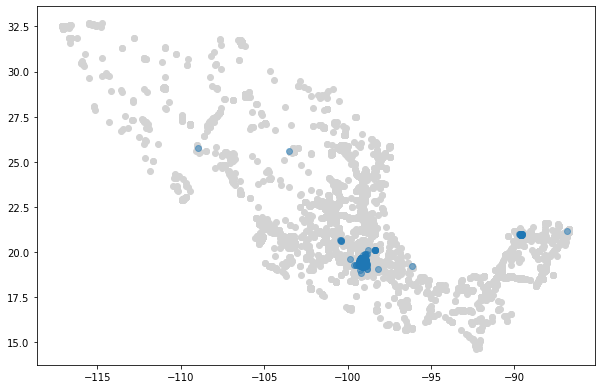

In [ ]:
#Dropoff Layoff Transport

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df1.plot(ax=ax, alpha=0.5, zorder=2)

In [ ]:
shape_df1 = gpd.read_file('/content/gis/gis_osm_traffic_free_1.shp')

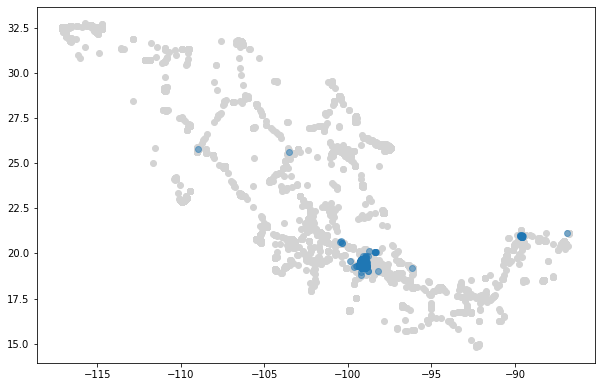

In [ ]:
#Pickup Layoff Traffic

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df1.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

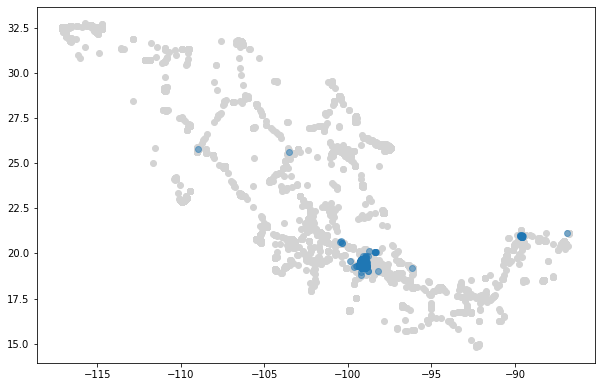

In [ ]:
#Dropoff Layoff Traffic

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df1.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df1.plot(ax=ax, alpha=0.5, zorder=2)

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# a1 = app_df['pickup_latitude']
# b1 = app_df['pickup_longitude']
# c1 = app_df['dropoff_latitude']
# d1 = app_df['dropoff_longitude']

def k_means_clustering( a1, b1, c1, d1, clusters, steps=100):
    vec_vals = []
    for i in range(len(a1)):
        a = a1[i]
        b = b1[i]
        c = c1[i]
        d = d1[i]
        vec_vals.append([a, b, c, d])
    v_vals = np.array(vec_vals)
    np.random.shuffle(v_vals)    
    
    sess = tf.compat.v1.Session()
    k = clusters
    points = v_vals
    data = tf.constant(points)
    
    # random initial centroids (points shuffled above)
    centroids = tf.Variable(data[:k, :])

    # add k dim to data and n dim to centroids to make matrices compatible
    # for array operations instead of loops
    data_expanded = tf.expand_dims(data, 0)
    centroids_expanded = tf.expand_dims(centroids, 1)

    # computes squared Euclidean distance between every point and every centroid
    # and get closest centroid for each point
    allocations = tf.argmin(tf.reduce_sum(tf.square(data_expanded - centroids_expanded), 2), 0)

    sess.run(tf.global_variables_initializer())
    c = 0 # index of centroid
    tf.equal(allocations, c)
    tf.gather(data, tf.where(tf.equal(allocations, c)))

    means = tf.concat(
        [tf.reduce_mean(
            tf.gather(data,
                      tf.where(tf.equal(allocations, c))), 0) for c in range(k)], 0)

    update_centroids = tf.assign(centroids, means)

    for step in range(steps):
        _, centroid_values, allocation_values = sess.run([update_centroids, centroids, allocations])
        
    clusters_df = pd.DataFrame({a1.name: points[:,0], b1.name: points[:,1], c1.name: points[:,2], d1.name: points[:,3],"cluster": allocation_values})
    # sns.lmplot(a1.name, b1.name, c1.name, d1.name, data=clusters_df, fit_reg=False, size=6, hue="cluster")
    # plt.show()
    print(clusters_df)
    clusters_df.to_csv("ClusteringResult.csv", index=False)
    
k_means_clustering(app_df['pickup_latitude'], app_df['pickup_longitude'], app_df['dropoff_latitude'], app_df['dropoff_longitude'], 2)

       pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0            19.357244        -99.060425         19.317852         -99.058702   
1            19.467729        -99.144030         19.473059         -99.144920   
2            19.361380        -99.076163         19.363256         -99.182353   
3            19.369209        -99.178807         19.354603         -99.178950   
4            19.284852        -99.163522         19.347363         -99.126072   
...                ...               ...               ...                ...   
12689        19.407373        -99.182447         19.406868         -99.193655   
12690        19.307605        -99.060404         19.307492         -99.060320   
12691        19.343543        -99.155939         19.306378         -99.115268   
12692        19.517182        -99.127331         19.483772         -99.131570   
12693        19.375472        -99.122852         19.373823         -99.113169   

       cluster  
0         